<a href="https://colab.research.google.com/github/chenirene00/Decision_tree_project/blob/master/Talking_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import required libraries and read in data


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/talking_data.csv')

#Understand the data


In [ ]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [ ]:
max(len(df['ip'].unique()),len(df['is_attributed'].unique()),len(df['attributed_time'].unique()),len(df['click_time'].unique()),len(df['channel'].unique()),len(df['os'].unique()),len(df['device'].unique()),len(df['app'].unique()))

80350

In [ ]:
df.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

1. There's 2 qulitative columns
2. There's 99773 missing values inside attributed_time


#Drop unuseful data

In [ ]:
df['app'].mean()*0.2

2.409576

In [ ]:
df['app'][df['app']<2.4]

6        1
8        2
14       2
16       2
27       1
        ..
99946    1
99953    2
99973    2
99986    2
99991    1
Name: app, Length: 14872, dtype: int64

In [ ]:
df = df[df['app']>2.4]

In [ ]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85128 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ip               85128 non-null  int64 
 1   app              85128 non-null  int64 
 2   device           85128 non-null  int64 
 3   os               85128 non-null  int64 
 4   channel          85128 non-null  int64 
 5   click_time       85128 non-null  object
 6   attributed_time  227 non-null    object
 7   is_attributed    85128 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 5.8+ MB


# Missing Values

1. Since there's too many data missin gin attributed_time, the column will be dropped

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85128 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ip               85128 non-null  int64 
 1   app              85128 non-null  int64 
 2   device           85128 non-null  int64 
 3   os               85128 non-null  int64 
 4   channel          85128 non-null  int64 
 5   click_time       85128 non-null  object
 6   attributed_time  227 non-null    object
 7   is_attributed    85128 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 5.8+ MB


In [ ]:
df.drop(columns=['attributed_time'],axis=1,inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed'], dtype='object')

#Datetimes

In [ ]:
df['click_time'] = pd.to_datetime(df['click_time'])

<ipython-input-49-7d263d0a5fa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click_time'] = pd.to_datetime(df['click_time'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85128 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ip             85128 non-null  int64         
 1   app            85128 non-null  int64         
 2   device         85128 non-null  int64         
 3   os             85128 non-null  int64         
 4   channel        85128 non-null  int64         
 5   click_time     85128 non-null  datetime64[ns]
 6   is_attributed  85128 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.2 MB


In [ ]:
df['week'] = df['click_time'].dt.dayofweek

<ipython-input-51-da2d9f8a18c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['click_time'].dt.dayofweek


In [ ]:
df['year'] = df['click_time'].dt.dayofyear

<ipython-input-52-48be1a6a4cdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['click_time'].dt.dayofyear


In [ ]:
df['month'] = df['click_time'].dt.month

In [ ]:
df['hour'] = df['click_time'].dt.hour

In [ ]:
df.drop(columns=['click_time'],axis=1,inplace=True)

In [ ]:
df.head()

,ip,app,device,os,channel,is_attributed,week,year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85128 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ip             85128 non-null  int64
 1   app            85128 non-null  int64
 2   device         85128 non-null  int64
 3   os             85128 non-null  int64
 4   channel        85128 non-null  int64
 5   is_attributed  85128 non-null  int64
 6   week           85128 non-null  int64
 7   year           85128 non-null  int64
 8   month          85128 non-null  int64
 9   hour           85128 non-null  int64
dtypes: int64(10)
memory usage: 7.1 MB


#Split Independent and Dependent

In [ ]:
X = df.drop(['is_attributed'],axis=1)
X

,ip,app,device,os,channel,week,year,month,hour
0,87540,12,1,13,497,1,311,11,9
1,105560,25,1,17,259,1,311,11,13
2,101424,12,1,19,212,1,311,11,18
3,94584,13,1,13,477,1,311,11,4
4,68413,12,1,1,178,3,313,11,9
...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,3,313,11,13
99996,85150,9,1,13,244,1,311,11,11
99997,18839,3,1,13,19,2,312,11,11
99998,114276,15,1,12,245,2,312,11,17


In [ ]:
y = df['is_attributed']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_attributed, Length: 85128, dtype: int64

#Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

#Train Classification Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3,criterion='gini')

In [ ]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=3)

#Predict values using train model

In [ ]:
y_train_pred = clf.predict(train_x)
y_test_pred = clf.predict(test_x)

In [ ]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

#Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
confusion_matrix(train_y,y_train_pred)

array([[67911,     0],
       [  191,     0]])

In [ ]:
confusion_matrix(test_y,y_test_pred)

array([[16990,     0],
       [   36,     0]])

In [ ]:
accuracy_score(test_y,y_test_pred)

0.997885586749677

#Plotting Decision Tree

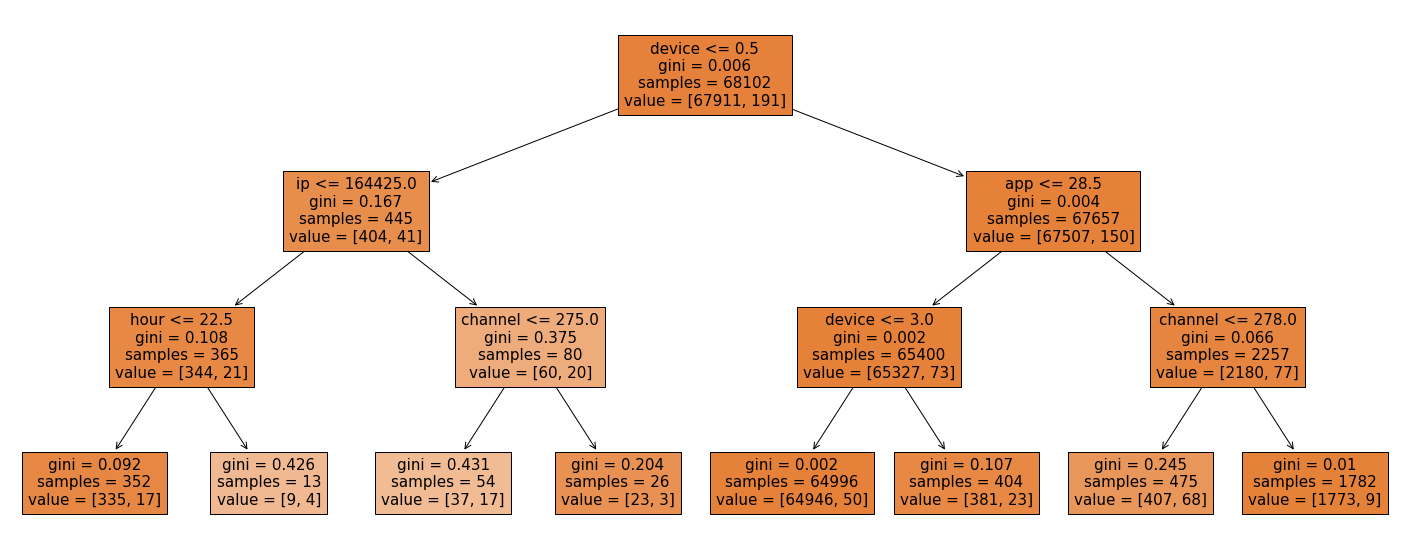

In [ ]:
from sklearn import tree
plt.figure(figsize = (25,10))
tree.plot_tree(clf,feature_names=train_x.columns,max_depth=3,filled=True)
plt.show()

#XG Boosting


In [ ]:
import xgboost as xgb

In [ ]:
from pandas.core.common import random_state
xgb_clf = xgb.XGBClassifier(max_depth=5,n_estimators=100,learning_rate=0.3,random_state=42)

In [ ]:
xgb_clf.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
accuracy_score(test_y,xgb_clf.predict(test_x))

0.9981205215552684

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

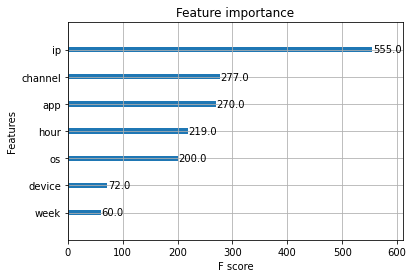

In [ ]:
xgb.plot_importance(xgb_clf)

#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf = BaggingClassifier(base_estimator=clf,n_estimators=100,bootstrap=True,random_state=42)

In [ ]:
bag_clf.fit(train_x,train_y)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=100, random_state=42)

In [ ]:
confusion_matrix(test_y,bag_clf.predict(test_x))

array([[16990,     0],
       [   36,     0]])

In [ ]:
accuracy_score(test_y,bag_clf.predict(test_x))

0.997885586749677

1. By comparing the accuracy_score of XG_Boost and Bagging, XG_boost have better accuracy than Bagging